# Assignment for Programming for Data Analysis Due 22nd of November 2020

This assignment includes the following tasks:
1. Explanation of the overall purpose of numpy.random package in Python
2. Explanation of the use of the "Simple random data" and "Permutations" functions
3. Explanation of the use and purpose of at least five "Distributions" functions
4. Explanation of the use of seeds in generating pseudorandom numbers

The following references are used in this assignment
[1] https://numpy.org/
[2] https://mathworld.wolfram.com/UniformDistribution.html
[3] https://www.w3schools.com/python/numpy_random_permutation.asp
[4] https://www.isrctn.com/editorial/retrieveFile/5cddbcff-b1f2-48a6-9ecd-2187e98adb60/36906
[5] Kay, J., Coltheart, M., & Lesser, R. (1992). Psycholinguistic Assessments of Language Processing in
Aphasia,(PALPA): Auditory Processing. Lawrence Erlbaum Associates.

## Purpose of numpy.random package and use of simple random data and permutations functions

The numpy.random package allows the user to produce pseudorandom numbers.  In order to do this the package uses a BitGenerator which creates sequences and a Generator that uses the sequences created by the BitGenerator to sample from different statistical distributions [1]   

In [1]:
import numpy as np
rng = np.random.default_rng()
# using default_rng() will get a new instance of a Generator with the default BitGenerator (PCG64). 
# it is then possible to call this Generator method to get samples from different distributions [1] 

In [2]:
rng.integers(3, size=15)
# this will return 15 random integers from 0 up to but not inclusive of 3 

array([1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1], dtype=int64)

dtype is a data type object and it describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. The default value is np.int64. as seen above

In [3]:
rng.integers(5, size=(2, 4))
# generate a 2 x 4 array 

array([[2, 0, 0, 0],
       [2, 3, 1, 3]], dtype=int64)

In [4]:
rng.integers(0, [3, 20, 10])
# generate numbers with a lower bound of 0 and an three different upper bounds

array([ 2, 16,  8], dtype=int64)

In [5]:
rng.integers(1, [5, 15, 10, 20], size=(2, 4))
# generate a 2 x 4 array with lower bound of 1 and four different upper bounds

array([[1, 9, 1, 5],
       [3, 7, 4, 7]], dtype=int64)

In [6]:
x = rng.integers(100, size=100000)
x

array([83, 23, 15, ..., 29, 82,  8], dtype=int64)

In [7]:
import matplotlib.pyplot as plt

(array([10047.,  9970.,  9897., 10138.,  9920., 10035., 10046.,  9874.,
        10144.,  9929.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

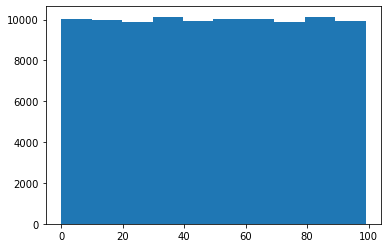

In [8]:
plt.hist(x)

The distribution above represents a uniform distribution.  If we changed the size to 10 million in Line 6 above we would definitely see a clear retangular distribution with a straight line on top of the retangle and that indicates a distribution that has constant probability [2].

Above is an example of simple random data function that returns random integers from low (inclusive) to high (exclusive) [1] with a uniform distribution. It is also possible to use simple random data functions to generate a random sample from a given 1-D array. 

In [9]:
y = rng.choice(5, 10000, p=[0.1, 0, 0.3, 0.6, 0])
# Generate a non-uniform randohm sample from np.arange(5) of size 5
# p is the probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

(array([1043.,    0.,    0.,    0.,    0.,    0., 2994.,    0.,    0.,
        5963.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

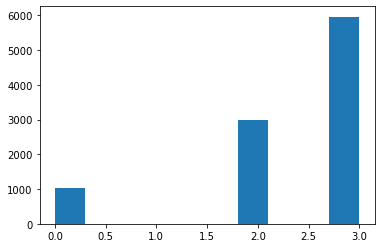

In [10]:
plt.hist(y)

Above we can see that this does not fit the uniform distribution as in the first histogram. We will look at other distributions further down the Jupyter Notebook. First we need to consider another set of functions available in numpy.random.Generator which are permutations. A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa and the numpy.random module provides two methods for carrying out permutations: shuffle() and permutation()[3]. Using shuffle it is possible to modify a sequence in-place by shuffling its contents so that the order of sub-arrays is changed but their contents remains the same [1]. In a similar manner, the use of the permutation function will randomly permute a sequence, or return a permuted range and leaves the original array unchanged [3].

In [11]:
arr = np.arange(10)
rng.shuffle(arr)
arr

array([7, 6, 1, 3, 9, 2, 5, 0, 4, 8])

In [12]:
arr = np.arange(9).reshape((3, 3))
rng.shuffle(arr)
arr

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

In [13]:
rng.permutation([1, 4, 9, 12, 15])

array([ 1, 12,  9,  4, 15])

## Distribution Functions
Below is an overview of five distribution functions: standard normal, binomial, chi square, F and t

In [14]:
rng = np.random.default_rng()
n, p = 10, .5
# number of trials, probability of each trial
s = rng.binomial(n, p, 10000)
# result of flipping a coin 10 times, tested 10000 times
s

array([3, 6, 7, ..., 7, 5, 4], dtype=int64)

(array([  11.,   98.,  434., 1145., 2074., 2494., 2053., 1164.,  425.,
         102.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

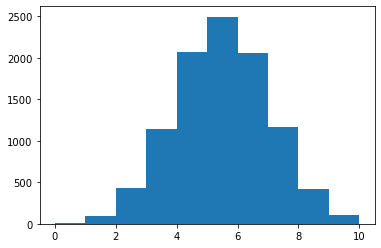

In [15]:
plt.hist(s)

In [16]:
chi = np.random.default_rng().chisquare(2,4)
chi

array([1.90973121, 0.621706  , 1.73196913, 3.38216195])

(array([1., 0., 0., 0., 2., 0., 0., 0., 0., 1.]),
 array([0.621706  , 0.8977516 , 1.17379719, 1.44984279, 1.72588838,
        2.00193398, 2.27797957, 2.55402517, 2.83007076, 3.10611636,
        3.38216195]),
 <BarContainer object of 10 artists>)

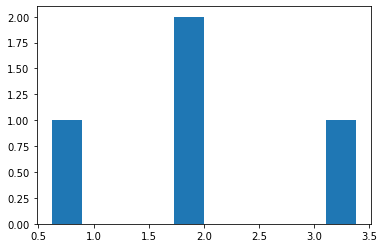

In [17]:
plt.hist(chi)

In [22]:
dfnum = 1. # between group degrees of freedom
dfden = 48. # within groups degrees of freedom
q = np.random.default_rng().f(dfnum, dfden, 1000)

In [20]:
np.sort(q)[-10]
# produces the lower bound for the the top 10%

7.3827480685219244

(array([748., 134.,  64.,  33.,   6.,   6.,   6.,   2.,   0.,   1.]),
 array([3.67252983e-06, 1.30862526e+00, 2.61724684e+00, 3.92586843e+00,
        5.23449001e+00, 6.54311160e+00, 7.85173318e+00, 9.16035477e+00,
        1.04689764e+01, 1.17775979e+01, 1.30862195e+01]),
 <BarContainer object of 10 artists>)

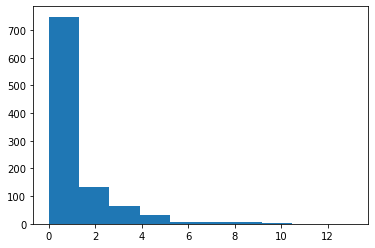

In [21]:
plt.hist(q)

(array([8.900000e+01, 4.974000e+03, 1.196990e+05, 1.027234e+06,
        3.229080e+06, 3.746264e+06, 1.604626e+06, 2.534020e+05,
        1.433500e+04, 2.970000e+02]),
 array([-5.37216214, -4.32880127, -3.2854404 , -2.24207953, -1.19871867,
        -0.1553578 ,  0.88800307,  1.93136394,  2.97472481,  4.01808568,
         5.06144654]),
 <BarContainer object of 10 artists>)

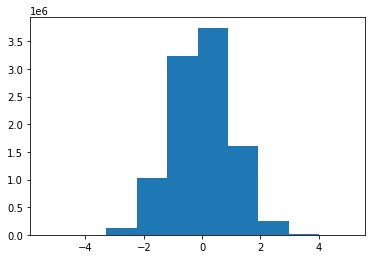

In [26]:
sn = rng.standard_normal(10000000)
plt.hist(sn)


The data below is taken from a study I was involved with.  There were 9 people with acquired communication disorders and this is a test of spoken word comprehension called PALPA 47.  There are 40 items in the test and on a set of control subjects the mean score was 39.29 and the std dev is 1.07.  Of course this data is only used as an example to help my understanding - it is not apporpriate in this context as the intake data does not fit a normal distribution curve and so a Student T test is not appropriate in this context.

In [42]:
intake = np.array([36, 28, 40, 31, 39, 27, 40, 33, 34])  
s = np.random.default_rng().standard_t(8, size = 10000)
# there are 9 participants so that means 8 degrees of freedom
np.mean(intake)

34.22222222222222

In [39]:
intake.std(ddof=1)

4.944132324730441

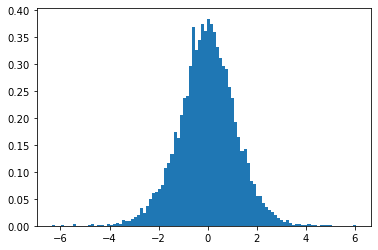

In [40]:
t = (np.mean(intake)-39.29)/(intake.std(ddof=1)/np.sqrt(len(intake)))
h = plt.hist(s, bins=100, density=True)

## Use of seeds in the generation of pseudorandom numbers in Python